In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

## 0. Описание задачи

 Определение диапозона цен машин при известных параметрах: бренда, модели, года выпуска, цвета и т.д.

## 1. Загрузка и чтение данных 

In [2]:
url = "https://raw.githubusercontent.com/SHVlader/ML/main/DB/USA_cars_datasets.csv"
data_raw = pd.read_csv(url)
data = pd.read_csv(url)
data_raw.shape

(2499, 13)

Таблица содержит данные о 2499 брендах машин с описанием 13 параметров

In [3]:
data_raw.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Выведем все признаки из датасета

In [4]:
data_raw.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

Удалим ненужные признаки

In [5]:
data_raw.drop(['Unnamed: 0', 'vin', 'lot', 'condition'], axis=1, inplace = True)

Признаки:
    
    1. Price - цена машин
    2. Brand - бренд машины 
    3. Model - модель 
    4. Year - год выпуска
    5. title_status - показывает статус машины (clean vehicle - нет случаев с авариями, salvage insurance - страхование от аварийного восстановления)
    6. mileage - пробег
    7. color - цвет машины 
    8. vin - это идентификационной номер автомобиля или другого транспортного средства, состоит из 17 символов
    9. lot - это идентификационный номер, присвоенный определенному количеству или партии материала от одного производителя. 
    Для автомобилей номер партии объединяется с серийным номером для формирования идентификационного номера транспортного средства.
    10. state - штат 
    11. country - страна
    12. condition - статус 


Так как мы хотим определить цену, посмотрим на значения в этом столбце.

In [6]:
data_raw['price']

0        6300
1        2899
2        5350
3       25000
4       27700
        ...  
2494     7800
2495     9200
2496     9200
2497     9200
2498     9200
Name: price, Length: 2499, dtype: int64

Создадим бинарный признак `'binary_price'`, чтобы разделить цену по диапозонам выше или ниже 42450.

In [7]:
data_raw['binary_price'] = np.where(data_raw['price'] >= 42450, 1, 0)
data_raw[['price', 'binary_price']]

,price,binary_price
0,6300,0
1,2899,0
2,5350,0
3,25000,0
4,27700,0
...,...,...
2494,7800,0
2495,9200,0
2496,9200,0
2497,9200,0


Столбцы `'brand'`, `'country'` и `'title_status'` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [8]:
data_raw['brand'] = data_raw['brand'].astype('category')
data_raw['brand'].dtype

CategoricalDtype(categories=['acura', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet',
                  'chrysler', 'dodge', 'ford', 'gmc', 'harley-davidson',
                  'heartland', 'honda', 'hyundai', 'infiniti', 'jaguar',
                  'jeep', 'kia', 'land', 'lexus', 'lincoln', 'maserati',
                  'mazda', 'mercedes-benz', 'nissan', 'peterbilt', 'ram',
                  'toyota'],
, ordered=False)

In [9]:
data_raw['title_status'] = data_raw['title_status'].astype('category')
data_raw['title_status'].dtype

CategoricalDtype(categories=['clean vehicle', 'salvage insurance'], ordered=False)

In [10]:
data_raw['country'] = data_raw['country'].astype('category')
data_raw['country'].dtype

CategoricalDtype(categories=[' canada', ' usa'], ordered=False)

## 2. Визуализация и описательная статистика

Получим информацию о признаках.

In [11]:
data_raw.describe()

,price,year,mileage,binary_price
count,2499.000000,2499.000000,2.499000e+03,2499.000000
mean,18767.671469,2016.714286,5.229869e+04,0.049620
std,12116.094936,3.442656,5.970552e+04,0.217202
min,0.000000,1973.000000,0.000000e+00,0.000000
25%,10200.000000,2016.000000,2.146650e+04,0.000000
50%,16900.000000,2018.000000,3.536500e+04,0.000000
75%,25555.500000,2019.000000,6.347250e+04,0.000000
max,84900.000000,2020.000000,1.017936e+06,1.000000


По умолчанию метод выше дает информацию только о количественных признаках.
Получим информацию о категориальных:

In [12]:
data_raw.describe(include=['category'])

,brand,title_status,country
count,2499,2499,2499
unique,28,2,2
top,ford,clean vehicle,usa
freq,1235,2336,2492


Вычислим матрицу корреляции для количественных признаков и визуализируем её образ.

In [13]:
corr_mat = data_raw.corr()
corr_mat

,price,year,mileage,binary_price
price,1.000000,0.418274,-0.400838,0.604254
year,0.418274,1.000000,-0.594686,0.101949
mileage,-0.400838,-0.594686,1.000000,-0.103166
binary_price,0.604254,0.101949,-0.103166,1.000000


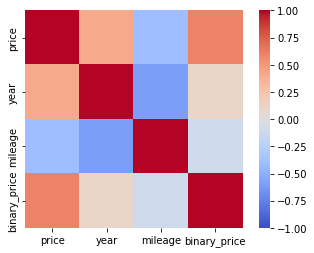

In [14]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Построим всевозможные диаграммы рассеивания для каждой пары переменных:

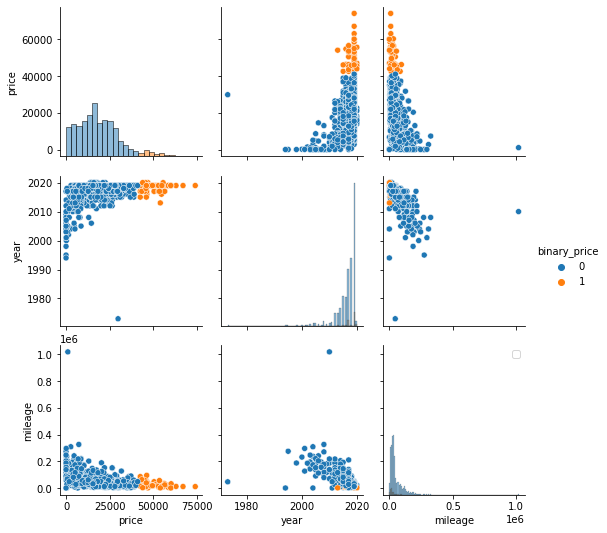

In [15]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='binary_price', diag_kind='hist')
plt.legend()
pass

##  3. Заполнение пропущенных значений 

Проверим, сколько пропущенных значений в каждом столбце матрицы:

In [16]:
data_raw.isna().sum()  

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
binary_price    0
dtype: int64

## 4. Бинаризация номинальных признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков. Скопируем нужные признаки в новую таблицу.

In [17]:
data_new = data_raw.loc[:, ['price', 'brand', 'model', 'year', 'title_status', 
                        'mileage', 'color', 'country', 
                        'binary_price']].copy()

Бинарные признаки `'color'` и `'country'` заменим на числовые.

In [18]:
data_new['color'] = pd.factorize(data_new['color'])[0]
data_new['country'] = pd.factorize(data_new['country'])[0]

К небинарномым признакам `'title_status'`, `'model'` и `'brand'` применим метод бинаризации с помощью функции `get_dummies`:

In [19]:
Title_Status_dummies = pd.get_dummies(data['title_status'])
Title_Status_dummies.head(7)

,clean vehicle,salvage insurance
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0


In [20]:
Model_dummies = pd.get_dummies(data['model'])
Model_dummies.head(7)

,1500,2500,2500hd,300,3500,5,acadia,altima,armada,bus,...,van,vans,vehicl,versa,volt,wagon,x3,xd,xt5,xterra
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Brand_dummies = pd.get_dummies(data['brand'])
Brand_dummies.head(7)

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,gmc,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Добавим эти dummy-столбцы к таблице и удалим соответствующие столбецы:

In [22]:
data_new = pd.concat((data_new, Title_Status_dummies), axis=1)
data_new = data_new.drop(['title_status'], axis=1)
data_new = pd.concat((data_new, Model_dummies), axis=1)
data_new = data_new.drop(['model'], axis=1)
data_new = pd.concat((data_new, Brand_dummies), axis=1)
data_new = data_new.drop(['brand'], axis=1)

In [23]:
data_new.head()

,price,year,mileage,color,country,binary_price,clean vehicle,salvage insurance,1500,2500,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
0,6300,2008,274117.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2899,2011,190552.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5350,2018,39590.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000,2014,64146.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,6654.0,3,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки нужно нормализовать. Выполним приведение всех признаков к отрезку $[0,1]$.

In [24]:
data_new.columns

Index(['price', 'year', 'mileage', 'color', 'country', 'binary_price',
       'clean vehicle', 'salvage insurance', '1500', '2500',
       ...
       'land', 'lexus', 'lincoln', 'maserati', 'mazda', 'mercedes-benz',
       'nissan', 'peterbilt', 'ram', 'toyota'],
      dtype='object', length=163)

In [25]:
data_norm = (data_new - data_new.min(axis=0)) / (data_new.max(axis=0) - data_new.min(axis=0))
data_norm.describe()

,price,year,mileage,color,country,binary_price,clean vehicle,salvage insurance,1500,2500,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,...,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,0.221056,0.930091,0.051377,0.080115,0.002801,0.049620,0.934774,0.065226,0.015606,0.003201,...,0.001601,0.000800,0.000800,0.000400,0.000800,0.004002,0.124850,0.001601,0.000400,0.000400
std,0.142710,0.073248,0.058654,0.110793,0.052862,0.217202,0.246974,0.246974,0.123971,0.056501,...,0.039984,0.028284,0.028284,0.020004,0.028284,0.063144,0.330615,0.039984,0.020004,0.020004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.120141,0.914894,0.021088,0.020833,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.199058,0.957447,0.034742,0.083333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.301007,0.978723,0.062354,0.104167,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Отбор признаков
Для предсказания стоимости автомобиля `'binary_price'` будем использовать все входные признаки кроме `'price'` и `'binary_price'`.

In [26]:
data_norm.columns

Index(['price', 'year', 'mileage', 'color', 'country', 'binary_price',
       'clean vehicle', 'salvage insurance', '1500', '2500',
       ...
       'land', 'lexus', 'lincoln', 'maserati', 'mazda', 'mercedes-benz',
       'nissan', 'peterbilt', 'ram', 'toyota'],
      dtype='object', length=163)

In [27]:
X = data_norm.drop(['price', 'binary_price'], axis=1)
y = data_norm['binary_price']

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 42)
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

N_train, _ = X_train.shape
N_test, _ = X_test.shape
N_train, N_test

(1874, 625)

## 7. Классификатор ближайших соседей kNN

In [30]:
from sklearn import metrics

In [31]:
print(1 - metrics.accuracy_score(y_test, y_test_pred))
print(np.mean(y_test != y_test_pred))

0.0464
0.0464


In [32]:
print(1 - metrics.accuracy_score(y_test, y_test_pred))
print(np.mean(y_test != y_test_pred))

0.0464
0.0464


In [33]:
k_range = range(1, 30)
err_train = []
err_test = []
for k in k_range:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

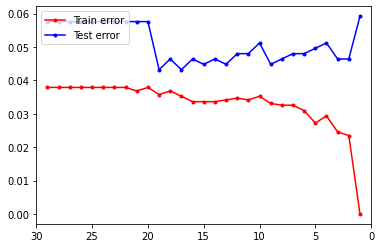

In [34]:
plt.plot(k_range, err_train, '.-r', label = 'Train error')
plt.plot(k_range, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.xlim([30, 0])
pass

In [35]:
print(min(err_test))
print(err_train[k_range[err_test.index(min(err_test))]])
print(k_range[err_test.index(min(err_test))])


0.0432
0.0368196371398079
17


Получено оптимально число ближайших соседей - 17 c минимальным значением ошибки на тестовой выборке и соответствующем значением ошибки на обучающей выборке. Ввиду ненатренерованности модели ошибка на обучающей выборке ниже, чем на тестовой. При увеличении количества соседей ошибка на обучающей выборке ухудшается, но незначительно улучшается ошибка на тестовой до определенного числа соседей.

## 8. Случайный лес

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("error_train : {:.16f}, error_test: {:.16f} ".format(err_train, err_test))

error_train : 0.0000000000000000, error_test: 0.0464000000000000 


Алгоритм случайного леса оказался близок по точности с алгоритмом k-ближайших соседей при оптимальных параметрах каждого из методов на тестовой выборке, на обучающей значительно точнее. У тренировочной выборки ошибка мала и близка к нулю.

## 9. Выводы
В работе производился анализ данных о стоимости автомобилей и решение задачи классификации с помощью моделей, которые были натренированы методами k-ближайших соседей и случайного леса. В ходе работы проведены:
1. Вычисление основных статистических характеристик и их анализ
2. Нормализация количественных признаков (с помощью линейного преобразования к отрезку [0, 1])
3. Разбиение данных на обучающую и тестовую выборки
4. Выбор алгоритма классификации и проверка качества модели
5. Сравнение 2 моделей, алгоритм случайного леса оказался лучше метода к-ближайших соседей

## 10. Подбор гиперпараметров

В связи c малым числом данных, оставим исходные количества данных обучающей и тестовой выборок. 

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

`Adam` довольно хорошо и стабильно работает с точки зрения как времени обучения, так и оценки проверки, следовательно, возьмём `Adam` в качестве solver. Для activation function -- `relu`. Подбёрем оптимальное число нейронов для однослойной сети из диапозона от 1 до 51.

In [38]:
%%time
hidden_layer_size = range(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer_size:
    model = MLPClassifier(hidden_layer_sizes=(size,), solver='adam', 
                          activation='relu', max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: user 2min 19s, sys: 1min 31s, total: 3min 50s
Wall time: 2min 10s


Построим графики зависимости ошибки и accuracy на обучающей и тестовой выборках от количества нейронов.

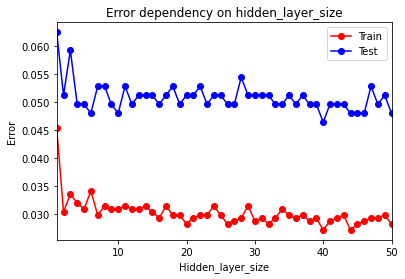

In [39]:
plt.title('Error dependency on hidden_layer_size')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.plot(hidden_layer_size, train_err, 'r-o', label = 'Train')
plt.plot(hidden_layer_size, test_err, 'b-o', label = 'Test')
plt.xlabel('Hidden_layer_size')
plt.ylabel('Error')
plt.legend()

In [40]:
print("Min train error: {0}, number of neurons: {1}.".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Min test error: {0}, number of neurons: {1}.".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Min train error: 0.027214514407684097, number of neurons: 40.
Min test error: 0.0464, number of neurons: 40.


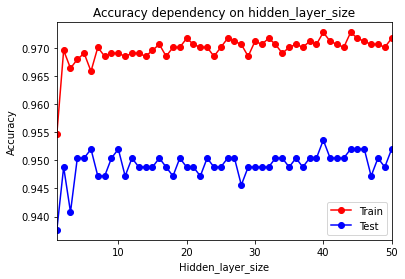

In [41]:
plt.title('Accuracy dependency on hidden_layer_size')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'Train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'Test')
plt.xlabel('Hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

In [42]:
print("Max train accuracy: {0}, number of neurons: {1}.".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Max test accuracy: {0}, number of neurons: {1}.".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

Max train accuracy: 0.9727854855923159, number of neurons: 40.
Max test accuracy: 0.9536, number of neurons: 40.


Подберем число нейронов для двуслойной модели, но зададим меньшее разбиение для более быстрого обучения с теми же solver и activation function.

In [43]:
%%time
n = 10
sizes = np.linspace(1, 50, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in enumerate(sizes):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes = (size_1, size_2, ), 
                              solver = 'adam', max_iter = 1000, 
                              activation = 'relu', random_state = 42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)
        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

CPU times: user 6min 57s, sys: 5min, total: 11min 58s
Wall time: 6min 23s


Найдём оптимальное количество нейронов на каждом слое относительно ошибки.

In [44]:
train_min_err_index = np.where(train_err == np.min(train_err))
train_max_err_sizes = [train_min_err_index[0][0] * 5, train_min_err_index[1][0] * 5]
test_min_err_index = np.where(test_err == np.min(test_err))
test_max_err_sizes = [test_min_err_index[0][0] * 5, test_min_err_index[1][0] * 5]
print('Min train error: ', np.min(train_err))
print('Min test error: ', np.min(test_err))
print('Min train error index: ', train_max_err_sizes)
print('Min test error index: ', test_max_err_sizes)

Min train error:  0.021878335112059766
Min test error:  0.0384
Min train error index:  [20, 0]
Min test error index:  [20, 35]


Ошибка у двуслойной модели ниже чем о однослойной, следовательно, выберем 2 как оптимальное число слоёв с найденным количеством нейронов.

In [45]:
hidden_layer_optimal_size_1 = test_max_err_sizes[0]
hidden_layer_optimal_size_2 = test_max_err_sizes[1]
print('The optimal value of the number of neurons: {0}, {1}.'.format(hidden_layer_optimal_size_1, hidden_layer_optimal_size_2))

The optimal value of the number of neurons: 20, 35.


Подберем `alpha` для найденного числа слоёв и нейронов с теми же solver и activation function`.

In [46]:
%%time
alpha_arr = np.logspace(-2, 2, 30)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha, 
                              hidden_layer_sizes=(hidden_layer_optimal_size_1, 
                                                  hidden_layer_optimal_size_2), 
                              solver='adam', activation='relu', 
                              max_iter=1000, random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: user 1min 41s, sys: 1min 18s, total: 2min 59s
Wall time: 1min 35s


Построим графиики ошибки и точности.

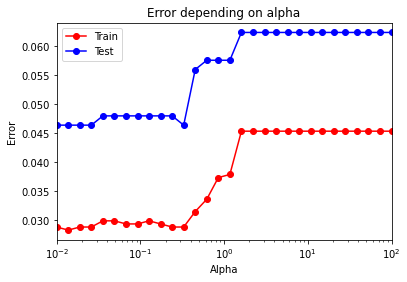

In [47]:
plt.title('Error depending on alpha')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'Train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'Test')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()

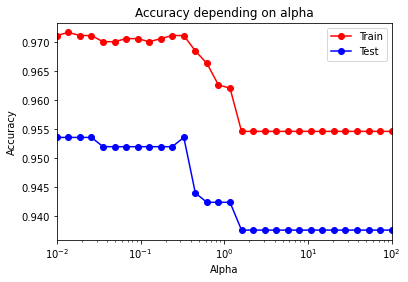

In [48]:
plt.title('Accuracy depending on alpha')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'Train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'Test')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()

In [49]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Min train error: ', min_train_err)
print('Min test error: ', min_test_err)

Min train error:  0.028281750266808965
Min test error:  0.0464


Найдём оптимальное значение `alpha`.

In [50]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)
print("Optimal alpha: ", alpha_opt)

0.01
Optimal alpha:  0.01


Обучим модель при всех найденных оптимальных значениях гиперпараметров.

In [51]:
mlp_model = MLPClassifier(alpha=alpha_opt, 
                          hidden_layer_sizes=(hidden_layer_optimal_size_1, 
                                              hidden_layer_optimal_size_2),
                          solver='adam', activation='relu', random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(20, 35), random_state=42)

Построим матрицу рассогласования для предсказанных значений.

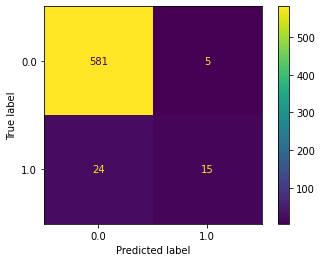

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=mlp_model.classes_)
disp.plot()
plt.show()

Выводы

Графики `train` и `test` схожи, что говорит об одинаковом распределении тренировочных и тестовых данных.
Наблюдается недообучение. Оптимальное число нейронов в однослойной модели: 40 с минимальной ошибкой $-$ 0.0464. При двуслойной модели минимальная ошибка на тесте составляет 0.0384 при количестве нейронов: 20, 35. Возьмём два слоя сети в качетсве оптимального числа слоёв.

С ростом коэффициента регуляризации растёт ошибка и снижается точность. Также наблюдается недообучения. При `alpha` > $\sqrt{10}$ начинается рост ошибки и снижение точности, то есть с ростом `alpha` веса модели уменьшаются. Это объяснимо из матрицы рассогласования: модель на обучающей выборке научилась хорошо предсказывать истинные значения, принадлежащие классу 0, но плохо предсказывает истинные значения, принадлежащие классу 1, из-за несбалансированности классов (значительно больше элементов принадлежащих первому классу). 